## Data Science Capstone - Wk 3 - Peer Graded Assignment 

### Segmenting and Clustering Neighborhoods in Toronto, Canada

# --PART 1-- Downloading and Cleaning Data

In [1]:
# Import required Libararies
import pandas as pd
import numpy as np

### Import data from Wikipedia

In [2]:
# Import Postal Code data for Toronto Canada from Wikipedia with pandas
source_file = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
canada_postal = pd.read_html(source_file, header=0)


# Multiple tabels retrieved from link - Return only first list to new dataframe
can_df = canada_postal[0] 

In [3]:
# Display retrieved data
can_df.head()

,Postal Code,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


In [4]:
print('Original data  has {} rows and {} columns'.format(can_df.shape[0],can_df.shape[1]))

Original data  has 180 rows and 3 columns


### Clean Data according to assignment instructions

In [5]:
# Clean data according to rules in step#3:

#Remove space from column name
can_df.rename(columns={'Postal Code':'PostalCode'}, inplace=True)  

#Filter out rows where no Borough assigned
can_df = can_df[can_df.Borough!='Not assigned'].reset_index(drop=True)

#Check changes to dataframe
can_df.head()

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [6]:
# Display dataframe descriptive statistics
can_df.describe(include=['object'])

,PostalCode,Borough,Neighborhood
count,103,103,103
unique,103,10,99
top,M4P,North York,Downsview
freq,1,24,4


### No duplicated data & No Unassigned Neiborhoods

In [7]:
# No duplicate Postal Codes in data set based on above stastistic
print('Toronto has {} unique Postal Codes and {} unique Boroughs'.format(len(can_df.PostalCode.unique()), len(can_df.Borough.unique())))

Toronto has 103 unique Postal Codes and 10 unique Boroughs


In [8]:
# Check for Unassigned Neighborhoods
print("There are {} Neighborhoods designated as 'Not assigned'".format(can_df[can_df.Neighborhood=='Not Assigned'].shape[0]))

There are 0 Neighborhoods designated as 'Not assigned'


### Display Dataframe for Part1: can_df

In [9]:
can_df.head(10)

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


### Display shape of cleaned dataframe

In [10]:
# End of data cleaning - display shape of dataframe
print('Shape of cleaned dataframe: ', can_df.shape)

Shape of cleaned dataframe:  (103, 3)


# --PART 2-- Importing Location Data to Dataset

### Attempts to use Geocoder to retrieve location data failed

### Code returned None for location of all postal codes

### Proceed with import data from available csv

In [12]:
# Import csv with location data
geo_link = 'https://cocl.us/Geospatial_data'
geodata = pd.read_csv(geo_link)
geodata.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


### Combine Dataframes using join 

### Display DataFrame for Part2: can_df_merged

In [13]:
# Combine cleaned dataframe from Part 1 with Location data
can_df_merged = can_df.join(geodata.set_index('Postal Code'), on='PostalCode')
can_df_merged.head(10)

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village",43.667856,-79.532242
6,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
7,M3B,North York,Don Mills,43.745906,-79.352188
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


# --PART 3-- Explore and Cluster Neighborhoods in Toronto

### Reduce data set to only Boroughs that contain the word 'Toronto'

### Then proceed to visualize and cluster based on similarities of top venues in each Postal Code

In [14]:
# Create new data frame with Boroughs containing the word 'Toronto'
tto_df = can_df_merged[can_df_merged.Borough.str.contains('Toronto')]

#Reset index
tto_df.reset_index(inplace=True, drop=True)

#Check new dataframe
tto_df.head(10)

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
4,M4E,East Toronto,The Beaches,43.676357,-79.293031
5,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
6,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
7,M6G,Downtown Toronto,Christie,43.669542,-79.422564
8,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568
9,M6H,West Toronto,"Dufferin, Dovercourt Village",43.669005,-79.442259


In [15]:
# Display Statistics for new dataframe
print('Toronto Dataframe tto_df has a shape: ', tto_df.shape)
print('Toronto Dataframe tto_df has {} unique Postal Codes and {} unique Boroughs'.format(len(tto_df.PostalCode.unique()), len(tto_df.Borough.unique())))

Toronto Dataframe tto_df has a shape:  (39, 5)
Toronto Dataframe tto_df has 39 unique Postal Codes and 4 unique Boroughs


### Visualize Toronto Map using Folium with Neighborhoods/Postal Codes identified by markers

In [16]:
# Visualize Toronto Map with Postal Codes Superimposed
# Import Mapping Library
#!conda install -c conda-forge folium=0.5.0 --yes
import folium

In [17]:
toronto_map = folium.Map(location=[43.730561, -79.360212], zoom_start=11)

for lat, lng, borough, postal in zip(tto_df['Latitude'], tto_df['Longitude'], tto_df['Borough'], tto_df['PostalCode']):
    sub_label = '{}, {}'.format(postal, borough) 
    label = folium.Popup(sub_label, parse_html=True) 
    folium.CircleMarker(
                    [lat, lng],
                    radius=5,
                    popup=label,
                    color='blue',
                    fill=True,
                    fill_color='#3186cc',
                    fill_opacity=0.7, 
                    parse_html=False).add_to(toronto_map)


#show map
toronto_map
    

### Explore Postal Codes with FourSquare

In [18]:
# Import Packages required to handling requests and json files
import requests
import json

In [19]:
# The code was removed by Watson Studio for sharing.

### Import getNearbyVenues Function from previoius Lab

### Extract only top 20 Venues for each Postal Code

In [20]:
# Define Function to Extract top 20 Venues in all Toronto Borough
# ---function borrowed from LAB on segmenting New York----

def getNearbyVenues(names, latitudes, longitudes, radius=500):

    venues_list=[]

    for name, lat, lng in zip(names, latitudes, longitudes):
             
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit=20'.format(CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius)
  
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        venues_list.append([(name,
                             lat,
                             lng,
                             v['venue']['name'],
                             v['venue']['location']['lat'], v['venue']['location']['lng'], v['venue']['categories'][0]['name']) for v in results])
        
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['PostalCode', 'Latitude', 'Longitude', 'Venue',
                             'Venue Latitude', 'Venue Longitude', 'Venue Category'] 
    
    return(nearby_venues)


### Apply function to all postal codes in Boroughs with Toronto in their name

In [21]:
# Execute function for each postal code in Toronto Dataframe, tto_df 
tto_venues = getNearbyVenues(names=tto_df['PostalCode'],latitudes=tto_df['Latitude'], longitudes=tto_df['Longitude'])

tto_venues.head(10)

,PostalCode,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,M5A,43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,M5A,43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,M5A,43.65426,-79.360636,Morning Glory Cafe,43.653947,-79.361149,Breakfast Spot
3,M5A,43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
4,M5A,43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa
5,M5A,43.65426,-79.360636,Impact Kitchen,43.656369,-79.356980,Restaurant
6,M5A,43.65426,-79.360636,Corktown Common,43.655618,-79.356211,Park
7,M5A,43.65426,-79.360636,The Extension Room,43.653313,-79.359725,Gym / Fitness Center
8,M5A,43.65426,-79.360636,The Distillery Historic District,43.650244,-79.359323,Historic Site
9,M5A,43.65426,-79.360636,Figs Breakfast & Lunch,43.655675,-79.364503,Breakfast Spot


### Group by postal code to visualize summary of venues retrieved per area

In [22]:
# Group by postal code to visualize data summary
tto_venues.groupby('PostalCode').count()

,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
PostalCode,,,,,,
M4E,4,4,4,4,4,4
M4K,20,20,20,20,20,20
M4L,20,20,20,20,20,20
M4M,20,20,20,20,20,20
M4N,3,3,3,3,3,3
M4P,8,8,8,8,8,8
M4R,19,19,19,19,19,19
M4S,20,20,20,20,20,20
M4T,3,3,3,3,3,3


In [23]:
# show number of unique venue categories in dataframe
print('There are {} unique categories of venues wihtin the selected area.'.format(len(tto_venues['Venue Category'].unique())))

There are 169 unique categories of venues wihtin the selected area.


## Analyze Each Neighborhood

In [24]:
# Expand Venue Category using One-Hot Encoding
tto_onehot = pd.get_dummies(tto_venues[['Venue Category']])
tto_onehot.head()

,Venue Category_Airport,Venue Category_Airport Food Court,Venue Category_Airport Lounge,Venue Category_Airport Service,Venue Category_Airport Terminal,Venue Category_American Restaurant,Venue Category_Art Gallery,Venue Category_Art Museum,Venue Category_Arts & Crafts Store,Venue Category_Asian Restaurant,...,Venue Category_Theater,Venue Category_Theme Restaurant,Venue Category_Toy / Game Store,Venue Category_Trail,Venue Category_Train Station,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Wine Bar,Venue Category_Wings Joint,Venue Category_Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# Simplify Venue Category Names
tto_onehot.columns = [col.split('_')[-1] for col in tto_onehot.columns]
tto_onehot.head()

,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wings Joint,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# Add Postal Code to dataframe
tto_onehot['PostalCode']=tto_venues['PostalCode']

In [27]:
# Group DataFrame by Postal Code and take mean frequency of occurrence of each category
tto_venues_grouped = tto_onehot.groupby('PostalCode').mean().reset_index()

tto_venues_grouped

,PostalCode,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wings Joint,Yoga Studio
0,M4E,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.00,0.00,0.00,...,0.00,0.00,0.00,0.250000,0.00,0.00,0.0000,0.00,0.00,0.000000
1,M4K,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.00,0.00,0.00,...,0.00,0.00,0.00,0.050000,0.00,0.00,0.0000,0.00,0.00,0.050000
2,M4L,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.00,0.00,0.00,...,0.00,0.00,0.00,0.000000,0.00,0.00,0.0000,0.00,0.00,0.000000
3,M4M,0.000000,0.000000,0.000000,0.000000,0.000000,0.0500,0.00,0.00,0.00,...,0.00,0.00,0.00,0.000000,0.00,0.00,0.0000,0.00,0.00,0.000000
4,M4N,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.00,0.00,0.00,...,0.00,0.00,0.00,0.000000,0.00,0.00,0.0000,0.00,0.00,0.000000
5,M4P,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.00,0.00,0.00,...,0.00,0.00,0.00,0.000000,0.00,0.00,0.0000,0.00,0.00,0.000000
6,M4R,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.00,0.00,0.00,...,0.00,0.00,0.00,0.000000,0.00,0.00,0.0000,0.00,0.00,0.052632
7,M4S,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.00,0.00,0.00,...,0.00,0.00,0.05,0.000000,0.00,0.00,0.0000,0.00,0.00,0.000000
8,M4T,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.00,0.00,0.00,...,0.00,0.00,0.00,0.333333,0.00,0.00,0.0000,0.00,0.00,0.000000
9,M4V,0.000000,0.000000,0.000000,0.000000,0.000000,0.0625,0.00,0.00,0.00,...,0.00,0.00,0.00,0.000000,0.00,0.00,0.0625,0.00,0.00,0.000000


### Determine the top 5 most common venues in each Postal Code

### Import function from previous lab

In [28]:
# Define function to return top 5 most common values to a dataframe
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues]

### Execute function to extract Top 5 venues for each Postal Code

In [29]:
# Execute function to Extract data into dataframe
num_top_venues = 5
indicators = ['st', 'nd', 'rd']

columns = ['PostalCode']

for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

postal_code_venues_sorted = pd.DataFrame(columns=columns) 

postal_code_venues_sorted['PostalCode'] = tto_venues_grouped['PostalCode']

for ind in np.arange(tto_venues_grouped.shape[0]): 
    postal_code_venues_sorted.iloc[ind, 1:] = return_most_common_venues(tto_venues_grouped.iloc[ind, :], num_top_venues) 


### Display dataframe with top 5 venues per postal code

In [30]:
postal_code_venues_sorted

,PostalCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,M4E,Neighborhood,Trail,Health Food Store,Pub,Cuban Restaurant
1,M4K,Greek Restaurant,Ice Cream Shop,Italian Restaurant,Yoga Studio,Pizza Place
2,M4L,Fast Food Restaurant,Sandwich Place,Fish & Chips Shop,Restaurant,Italian Restaurant
3,M4M,Coffee Shop,Café,Bakery,Comfort Food Restaurant,Pet Store
4,M4N,Park,Swim School,Bus Line,Yoga Studio,Deli / Bodega
5,M4P,Pizza Place,Park,Breakfast Spot,Gym / Fitness Center,Sandwich Place
6,M4R,Clothing Store,Coffee Shop,Yoga Studio,Sporting Goods Shop,Ice Cream Shop
7,M4S,Dessert Shop,Italian Restaurant,Gym,Sushi Restaurant,Café
8,M4T,Restaurant,Park,Trail,Cuban Restaurant,Dog Run
9,M4V,Coffee Shop,Pub,Fried Chicken Joint,Sushi Restaurant,Bagel Shop


### Perform Clustering using k-Means  on grouped Data to find similarities based on top venue types in each Postal Code

In [31]:
# Import Packages
from sklearn.cluster import KMeans

#### Preprocessing:  Remove Postal Code from Dataset 

In [32]:
# Remove unnecessary column and save to new dataframe
tto_venues_clustering = tto_venues_grouped.drop('PostalCode', axis=1)

### Attempt to Find Best K value

<function matplotlib.pyplot.show(*args, **kw)>

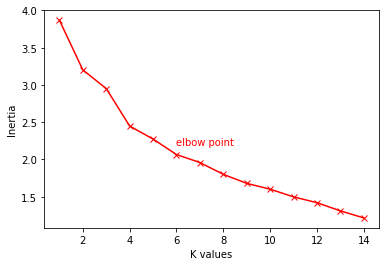

In [36]:
# Import Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Create loop for testing values of K from 1-14
#---Assess K based on inertia (sum of squared distances from samples to their cluster center)
inertias=[]
X=tto_venues_clustering

for k in range(1,15): 
    temp_kmeans = KMeans(n_clusters=k).fit(X) 
    temp_kmeans.fit(X)     
      
    inertias.append(temp_kmeans.inertia_)
    
# Plot Graph
plt.plot(range(1,15), inertias, '-rx')
plt.xlabel('K values')
plt.ylabel('Inertia')
plt.text(6, 2.2, "elbow point", color='r')
plt.show

#### Employ K-Means to label data sets for Clusters=6

In [37]:
# Initiate clustering with 6 clusters
kclusters=6
kmeans = KMeans(n_clusters=kclusters, random_state=0, n_init=12)
kmeans.fit(tto_venues_clustering)

#show labels
kmeans.labels_[0:10]

array([4, 4, 4, 1, 3, 4, 4, 4, 5, 4], dtype=int32)

#### Create New Data Frame with Cluster Labels and Top 5 Venues per Postal Code

In [38]:
# Insert Cluster Labels to Dataframe with Top 5 Venues per Postal Code
postal_code_venues_sorted.insert(0,'Cluster Labels', kmeans.labels_)

# Create new dataframe from data containing only Boroughs with Toronto in their name
toronto_merged = tto_df

# Merge datasets uing join function
toronto_merged = toronto_merged.join(postal_code_venues_sorted.set_index('PostalCode'), on='PostalCode')


### Display Merged Dataframe

In [39]:
toronto_merged

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,4,Coffee Shop,Park,Breakfast Spot,Performing Arts Venue,Distribution Center
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,4,Coffee Shop,Sushi Restaurant,Hobby Shop,Creperie,Mexican Restaurant
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,1,Café,Plaza,Tea Room,Shopping Mall,Clothing Store
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,4,Gastropub,Restaurant,Coffee Shop,BBQ Joint,Creperie
4,M4E,East Toronto,The Beaches,43.676357,-79.293031,4,Neighborhood,Trail,Health Food Store,Pub,Cuban Restaurant
5,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,4,Seafood Restaurant,Bistro,Bakery,Cocktail Bar,Park
6,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383,4,Coffee Shop,Japanese Restaurant,Italian Restaurant,Ramen Restaurant,Sushi Restaurant
7,M6G,Downtown Toronto,Christie,43.669542,-79.422564,1,Grocery Store,Café,Park,Athletics & Sports,Nightclub
8,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568,4,Coffee Shop,Sushi Restaurant,Speakeasy,Plaza,Steakhouse
9,M6H,West Toronto,"Dufferin, Dovercourt Village",43.669005,-79.442259,1,Pharmacy,Bakery,Grocery Store,Supermarket,Music Venue


### Visualize Clusters on Folium Map - Postal Codes Clustered based on Similarity of top venues in area

In [42]:
# Display Map with clusters shown in popup labels and map colors

# Import Additional Libraries
import matplotlib.cm as cm
import matplotlib.colors as colors
#

tto_clusters = folium.Map(location=[43.730561, -79.360212], zoom_start=10)

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)] 
colors_array = cm.rainbow(np.linspace(0, 1, len(ys))) 
rainbow = [colors.rgb2hex(i) for i in colors_array]
markers_colors = []

for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'],
                                  toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ': Cluster# ' + str(cluster), parse_html=True)
    folium.CircleMarker( [lat, lon],
                        radius=5,
                        popup=label,
                        color=rainbow[cluster-1],
                        fill=True,
                        fill_color=rainbow[cluster-1],
                        fill_opacity=0.7).add_to(tto_clusters)

#Show Map
tto_clusters
 

### Examine Specific Cluster by changing ClusterNumber and executing cell

In [43]:
ClusterNumber=1
toronto_merged.loc[toronto_merged['Cluster Labels'] == ClusterNumber, toronto_merged.columns[[0]+[1]+[2] + list(range(6, toronto_merged.shape[1]))]]

,PostalCode,Borough,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
2,M5B,Downtown Toronto,"Garden District, Ryerson",Café,Plaza,Tea Room,Shopping Mall,Clothing Store
7,M6G,Downtown Toronto,Christie,Grocery Store,Café,Park,Athletics & Sports,Nightclub
9,M6H,West Toronto,"Dufferin, Dovercourt Village",Pharmacy,Bakery,Grocery Store,Supermarket,Music Venue
13,M5K,Downtown Toronto,"Toronto Dominion Centre, Design Exchange",Coffee Shop,Café,Deli / Bodega,Bakery,Steakhouse
14,M6K,West Toronto,"Brockton, Parkdale Village, Exhibition Place",Café,Coffee Shop,Breakfast Spot,Bakery,Performing Arts Venue
16,M5L,Downtown Toronto,"Commerce Court, Victoria Hotel",Café,Coffee Shop,Bakery,Pub,Deli / Bodega
17,M4M,East Toronto,Studio District,Coffee Shop,Café,Bakery,Comfort Food Restaurant,Pet Store
22,M6P,West Toronto,"High Park, The Junction South",Café,Thai Restaurant,Grocery Store,Flea Market,Music Venue
24,M5R,Central Toronto,"The Annex, North Midtown, Yorkville",Café,Sandwich Place,Coffee Shop,Pharmacy,BBQ Joint
27,M5S,Downtown Toronto,"University of Toronto, Harbord",Restaurant,Bookstore,Japanese Restaurant,Bakery,Yoga Studio
